In [0]:
import datetime as dt
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
#matplotlib.use('tkagg')

In [0]:

accidents = pd.read_csv('/content/drive/My Drive/SET2/datasets/preprocessed_accidents.csv', index_col='Accident_Index')
casualties = pd.read_csv('/content/drive/My Drive/SET2/datasets/preprocessed_casualties0515.csv', error_bad_lines=False, index_col='Accident_Index', warn_bad_lines=False)
vehicles = pd.read_csv('/content/drive/My Drive/SET2/datasets/Vehicles0515.csv', error_bad_lines=False, index_col='Accident_Index', warn_bad_lines=False)

In [0]:
accidents = accidents.join(vehicles, how='outer')
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']
for col in accidents.columns:
    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)

In [0]:
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

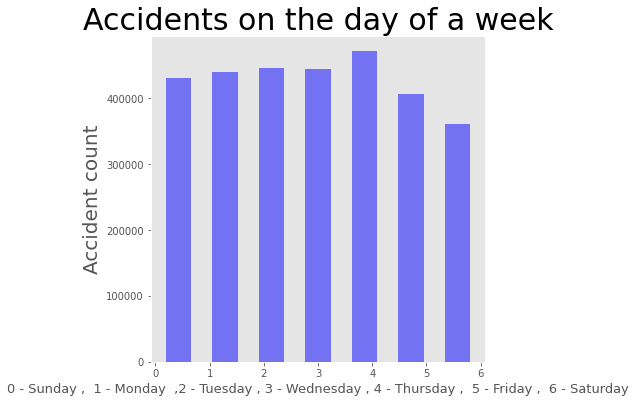

In [6]:
plt.figure(figsize=(6,6))
accidents.Date_time.dt.dayofweek.hist(bins=7, rwidth=0.55, alpha=0.5, color= 'blue')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday ,  5 - Friday ,  6 - Saturday' , fontsize = 13)
plt.show()

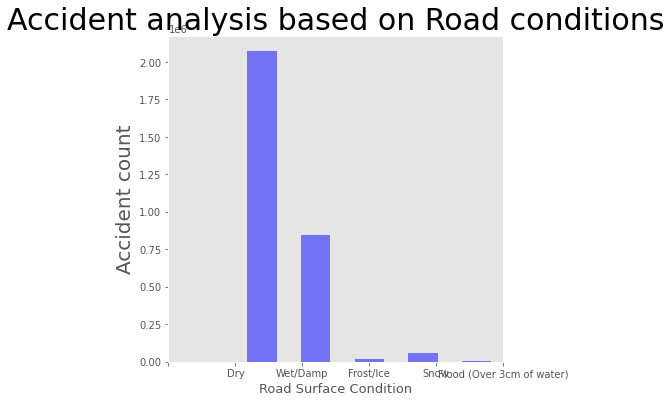

In [8]:
objects = ['','Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood (Over 3cm of water)']
plt.figure(figsize=(6,6))
accidents.Road_Surface_Conditions.hist(bins=5, rwidth=0.55, alpha=0.5, color='blue')
plt.title('Accident analysis based on Road conditions', fontsize=30)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.ylabel('Accident count', fontsize=20)
plt.xlabel('Road Surface Condition', fontsize = 13)
plt.show()

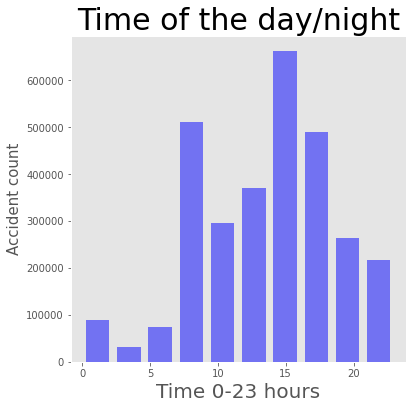

In [9]:
plt.figure(figsize=(6,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'blue')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)
plt.show()

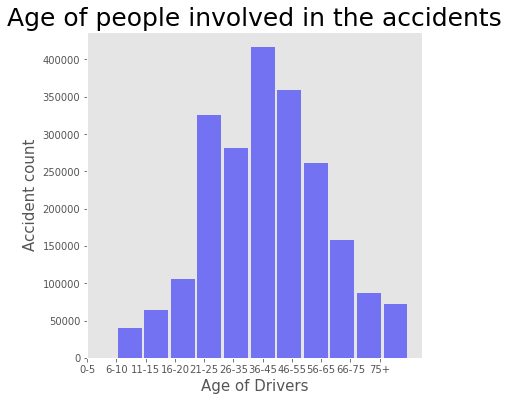

In [10]:
objects = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-35',
           '36-45', '46-55', '56-65', '66-75', '75+']
plt.figure(figsize=(6, 6))
casualties.Age_Band_of_Casualty.hist(bins=11, alpha=0.5, rwidth=0.90, color= 'blue')
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.ylabel('Accident count', fontsize=15)
plt.xlabel('Age of Drivers', fontsize=15)
plt.show()

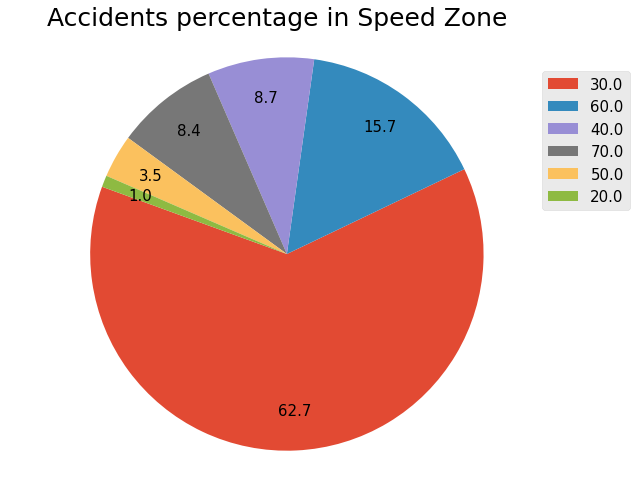

In [11]:
speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin(['20', '30', '40', '50', '60', '70'])]
speed = speed_zone_accidents.Speed_limit.value_counts()
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
plt.figure(figsize=(10, 8))
plt.pie(speed.values, labels=None,
        autopct='%.1f', pctdistance=0.8, labeldistance=1.9, explode=explode, shadow=False, startangle=160,
        textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1, 0.7), loc="center right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5, .9, 'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()